# Helicopter Prison Escapes Analysis

For this project, we will be analyzing a dataset of helicopter prison escapes from this [Wikipedia Dataset](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts)
by using Python, Pandas library, and webscraping using BeautifulSoup

Here is a sample of the helicopter prison escapes dataset

| Data | Prison name | Country | Succeeded | Escapee(s) | Details | 
| --- | --- | --- | --- | --- | --- |
| July 23, 2009 | Bruges | Belgium | Yes | Ashraf Sekkaki plus three other criminals | A man hijacked a helicopter and forced its pilot to land in a prison outside the city of Bruges. The helicopter picked up four men including Ashraf Sekkaki, a 26-year-old convicted bank robber who has been described as one of the most dangerous criminals in Belgium. Sekkaki escaped from another prison in 2003. The escapees then flew to the town of Aalter, then seized a black Mercedes from its female driver and robbed a service station before heading for the Belgian coast.[59] He was captured in Morocco two weeks later.[60] | 
| May 26, 1986 | Prison de la Santé | France | Yes | Michel Vaujour | 	Vaujour had 28 years to serve for attempted murder and armed robbery; this was his fourth escape attempt. He made his way to the roof by threatening guards with a fake pistol and nectarines painted as grenades. On top of the jail he was picked up by his wife Nadine, who had taken helicopter pilot lessons especially for the escape.[5] They landed at a nearby football pitch and fled in a waiting car.[2] Paris-Match published amateur photos of the escape, which was made into a film starring Béatrice Dalle in 1991.[18] |
| February 22, 2009 | Korydallos Prison | Greece | Yes | Vasilis Paleokostas, Alket Rizaai | On February 22, 2009 Vasilis Paleokostas and another man (Alket Rizai) escaped from Korydallos Prison by helicopter. They had escaped in a similar manner during 2006 but they were eventually arrested. Their new prison break took place while their trial for the 2006 helicopter-assisted escape was ongoing. They were transferred to Korydallos Prison just one day before their new escape, in order to attend their trial.[53] Alket Rizai was recaptured in November 2009.[54] Vasilis Paleokostas remains a fugitive. |

There are six columns in total which are self descriptive. In this project, we'll answer the following questions:
- In which year did the most helicopter prison breaks attempts occur? 
- In which countries do the most attempted helicopters prison escapes occur?
- Which country had the highest rate of failure of prison escapes? 
- Which country had the highest rate of success of prison escapes?





### First, let's import the data from the wikipedia page

In [2]:
# Scrape wikipedia table into pandas dataframe
from bs4 import BeautifulSoup
import requests
import pandas as pd

wiki_url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts"
table_name = "wikitable sortable"
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, "html.parser")

attempts_table = soup.find('table', {'class': table_name})
df = pd.read_html(str(attempts_table))
attempts_df = df[0] # get dataframe out of df list 

for i in range(3): # printing first three rows of dataframe
    print(attempts_df.iloc[i])
    
#checking columns in dataframe
print("\n")
print(attempts_df.columns)

Date                                             August 19, 1971
Prison name                                Santa Martha Acatitla
Country                                                   Mexico
Succeeded                                                    Yes
Escapee(s)     Joel David Kaplan Carlos Antonio Contreras Castro
Details        Joel David Kaplan was a New York businessman w...
Name: 0, dtype: object
Date                                            October 31, 1973
Prison name                                        Mountjoy Jail
Country                                                  Ireland
Succeeded                                                    Yes
Escapee(s)                  JB O'Hagan Seamus TwomeyKevin Mallon
Details        On October 31, 1973 an IRA member hijacked a h...
Name: 1, dtype: object
Date                                                May 24, 1978
Prison name                   United States Penitentiary, Marion
Country                                     

### Now that we have successfully converted the data into a pandas DataFrame, let's remove irrelevant columns

In [3]:
attempts_df = attempts_df.drop(["Details"], axis=1)

### Now that we have all relevant columns, let's change the Date column from an object to int64 by only keeping the years

In [4]:
# Converting column Date from object to datetime
attempts_df["Date"] = pd.to_datetime(attempts_df["Date"], errors='coerce') # errors coerce used as some values are missing

In [5]:
print(attempts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.0+ KB
None


In [6]:
# Adding year column
attempts_df['Year'] = pd.to_datetime(attempts_df['Date']).dt.year

In [7]:
# Checking to see updated dataframe columns and datatype
print(attempts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
 5   Year         48 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.4+ KB
None


### Now that the data has been cleaned up, we can now analyze the data.

Let's first answer the question of in which year did the most helicopter prison breaks attempts occur?

In [8]:
import matplotlib.pyplot as plt 

years_attempt_dict = {} # initialize dictionary to hold years as key and number of attempts in that year as values
for row in attempts_df.itertuples():
    year = row[6]
    if year in years_attempt_dict:
        years_attempt_dict[year] += 1
    else:
        years_attempt_dict[year] = 1
        
print(years_attempt_dict)



{1971: 1, 1973: 1, 1978: 1, 1981: 2, 1983: 1, 1985: 2, 1986: 3, 1987: 1, 1988: 1, 1989: 2, 1990: 1, 1991: 1, 1992: 2, 1993: 1, 1996: 1, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 2, 2003: 1, 2005: 2, 2006: 1, 2007: 3, 2009: 3, 2010: 1, 2012: 1, 2013: 2, 2014: 1, 2016: 1, 2018: 1, 2020: 1}


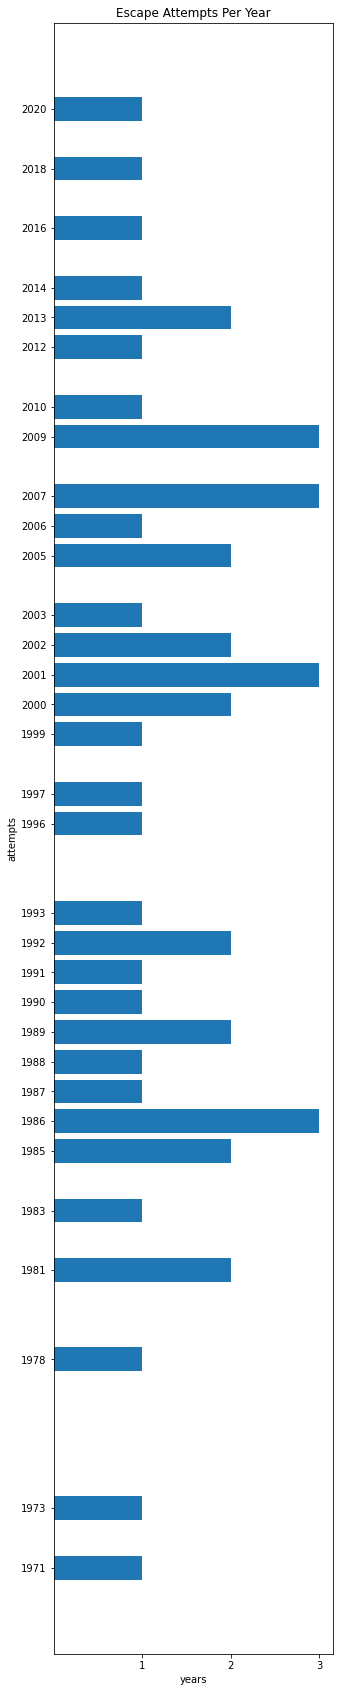

In [15]:
# convert dictionary into lists of keys and values to plot a bar chart
x_years = list(years_attempt_dict.keys())
y_values = list(years_attempt_dict.values())

plt.barh(x_years, y_values)
plt.xticks([1,2,3])                         # changing scaling for x axis
plt.yticks([i for i in x_years])            # changing scaling for y axis
plt.rcParams['figure.figsize'] = [5, 30]
plt.title('Escape Attempts Per Year')
plt.xlabel("years")
plt.ylabel("attempts")
plt.show()

Based on this graph, the years in which the most helicopter prison break attempts were occurred were 1986, 2001, 2007, and 2009 with a total of three attempts each.

# Attempts by Country

In [14]:
attempts_by_country = {}

for row in attempts_df.itertuples():
    country = row[3]
    if country in attempts_by_country:
        attempts_by_country[country] += 1
    else:
        attempts_by_country[country] = 1
        
print(attempts_by_country)


{'Mexico': 1, 'Ireland': 1, 'United States': 8, 'France': 15, 'Canada': 4, 'Australia': 2, 'Brazil': 2, 'Italy': 1, 'United Kingdom': 2, 'Puerto Rico': 1, 'Chile': 1, 'Netherlands': 1, 'Greece': 4, 'Belgium': 4, 'Russia': 1}


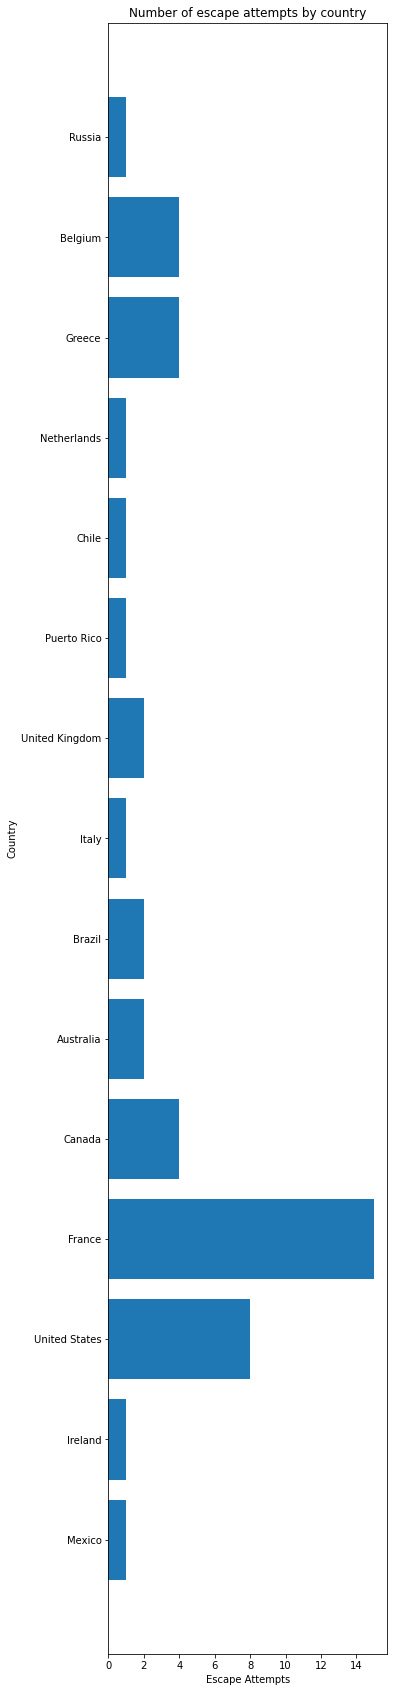

In [30]:
# convert dictionary into lists of keys and values to plot a bar chart

x_country = list(attempts_by_country.keys())
y_attempts = list(attempts_by_country.values())

plt.barh(x_country, y_attempts)
plt.ylabel("Country")
plt.xlabel("Escape Attempts")
plt.title("Number of escape attempts by country")
plt.show()

From the graph above, the country with the most number of attempts is France with 15 attempts and the countries with the least number of attempts are Mexico, Ireland, Netherlands, Chile, Puerto Rico, Italy, and Russia with one attempt.

# Which country had the highest rate of failure of prison escapes? Highest rate of success of prison escapes?

In [35]:
fail_country_attempt = {}
success_country_attempt = {}

for row in attempts_df.itertuples():
    country = row[3]
    success = row[4].lower()
    if country in fail_country_attempt and success == "no":
        fail_country_attempt[country] += 1
    elif country not in fail_country_attempt and success == "no":
        fail_country_attempt[country] = 1
    elif country not in fail_country_attempt and success == "yes":
        fail_country_attempt[country] = 0
            
    if country in success_country_attempt and success == "yes":
        success_country_attempt[country] += 1
    elif country not in success_country_attempt and success == "yes":
        success_country_attempt[country] = 1
    elif country not in success_country_attempt and success == "no":
        success_country_attempt[country] = 0
        
# converting number of failures and successses into proportions using attempts_by_country
fail_country_attempt_prop = {}
success_country_attempt_prop = {}
for key, value in fail_country_attempt.items():
    fail_country_attempt_prop[key] = round((value / attempts_by_country[key]) * 100, 2)
    
for key, value, in success_country_attempt.items():
    success_country_attempt_prop[key] = round((value / attempts_by_country[key]) * 100, 2)
    
print(fail_country_attempt_prop)
print("\n")
print(success_country_attempt_prop)
            


{'Mexico': 0.0, 'Ireland': 0.0, 'United States': 25.0, 'France': 26.67, 'Canada': 25.0, 'Australia': 50.0, 'Brazil': 0.0, 'Italy': 0.0, 'United Kingdom': 50.0, 'Puerto Rico': 0.0, 'Chile': 0.0, 'Netherlands': 100.0, 'Greece': 50.0, 'Belgium': 50.0, 'Russia': 0.0}


{'Mexico': 100.0, 'Ireland': 100.0, 'United States': 75.0, 'France': 73.33, 'Canada': 75.0, 'Australia': 50.0, 'Brazil': 100.0, 'Italy': 100.0, 'United Kingdom': 50.0, 'Puerto Rico': 100.0, 'Chile': 100.0, 'Netherlands': 0.0, 'Greece': 50.0, 'Belgium': 50.0, 'Russia': 100.0}


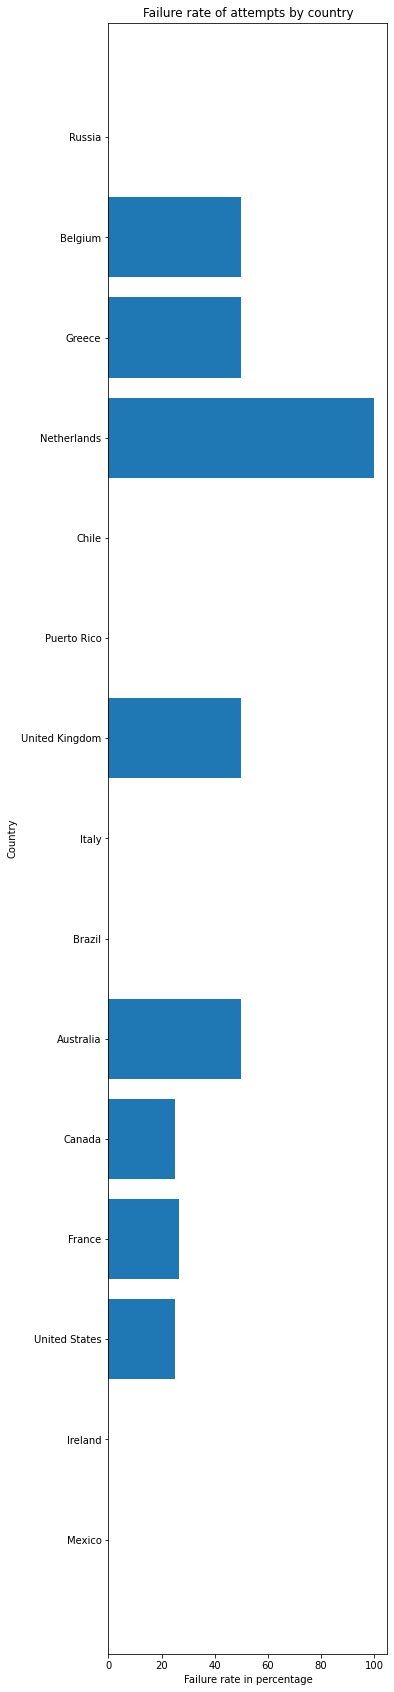

In [37]:
# convert dictionary into lists of keys and values to plot a bar chart
x_country = list(fail_country_attempt_prop.keys())
y_rate = list(fail_country_attempt_prop.values())

plt.barh(x_country, y_rate)
plt.title("Failure rate of attempts by country")
plt.ylabel("Country")
plt.xlabel("Failure rate in percentage")
plt.show()



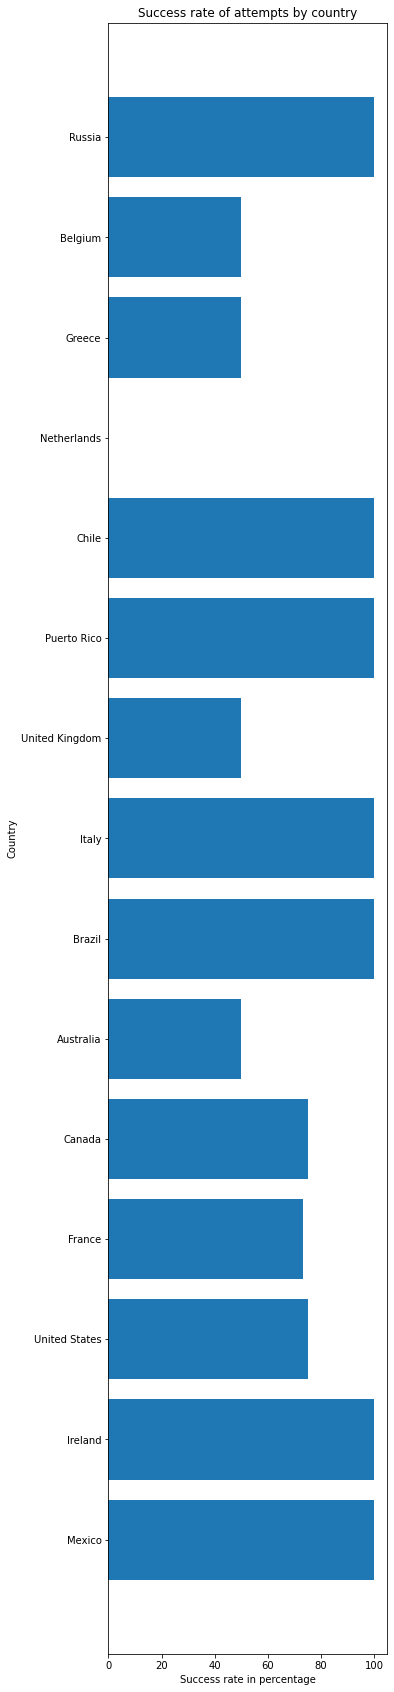

In [38]:
# for success rate
x_country_success = list(success_country_attempt_prop.keys())
y_rate_success = list(success_country_attempt_prop.values())

plt.barh(x_country_success, y_rate_success)
plt.title("Success rate of attempts by country")
plt.ylabel("Country")
plt.xlabel("Success rate in percentage")
plt.show()


Based on the figures above, the country with the highest failure rate of attempts is the Netherlands with 100 percent rate of failure and countries with the highest rate of success are Mexico, Ireland, Italy, Brazil, Chile, Puerto Rico, and Russia with 100 percent rate of success.

However, it is important to take into consideration the sample size per country which range from 1-15 data points which skews the data. 